In [50]:
# Instalação das bibliotecas necessárias
!pip install plotly
!pip install seaborn

# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import locale

# Carregar o DataFrame a partir de um arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Dataset_Cefem.csv')

# Verificando se o DataFrame foi carregado corretamente
print(df.head())



                Cidade      Jan.       Fev.      Mar.      Abr.      Mai.  \
0  ABADIA DOS DOURADOS  13357,19  121679,33   1839,46    629,68   2143,11   
1           ABRE CAMPO              6801,62             2157,04   1237,31   
2              ACAIACA  42424,46   47443,64  41879,21  25177,32  27681,76   
3        ÁGUA COMPRIDA                                  4297,52             
4              AIMORÉS   3902,21    2403,01   3221,44   4794,23   1357,42   

       Jun.      Jul.      Ago.      Set.      Out. Nov. Dez.    Total.  
0    637,07  23237,41   9535,31   2250,95   2299,39            177608,9  
1             3888,64   3627,25  16400,78   4456,36            38569,01  
2  45170,08  22992,41  14123,76  25724,17  42877,69            335494,5  
3             2978,89                                            7276,4  
4   3593,74   1724,14   2481,38   2882,51   2897,56            29257,63  


In [61]:
# Definir a lista de meses de acordo com as colunas do DataFrame
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Configurar locale para português do Brasil
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
except:
    try:
        locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil.1252')
    except:
        print("Aviso: Não foi possível configurar o locale para português brasileiro")

# Configurações de estilo usando seaborn diretamente
sns.set()

# Função para formatar valores em reais
def format_currency_br(value):
    if pd.isna(value) or value == 0:
        return "0 M"
    return f"{value/10000000} M"

# Função para formatar valores nos eixos
def format_axis_br(x, p):
    return format_currency_br(x)

# Garantir que todos os valores na coluna 'Total.' estão como string para aplicar .str.replace
df['Total.'] = df['Total.'].astype(str)

# Remover possíveis caracteres não numéricos (ex.: pontos, vírgulas)
df['Total.'] = df['Total.'].str.replace('.', '', regex=False).str.replace(',', '', regex=False)

# Converter a coluna 'Total.' para numérico (milhões de reais)
df['Total.'] = pd.to_numeric(df['Total.'], errors='coerce')

# Verificando se a conversão foi bem-sucedida
print(df['Total.'].dtypes)  # Deve exibir float64 ou int64



Aviso: Não foi possível configurar o locale para português brasileiro
int64


<ipython-input-62-1e4239346a19>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




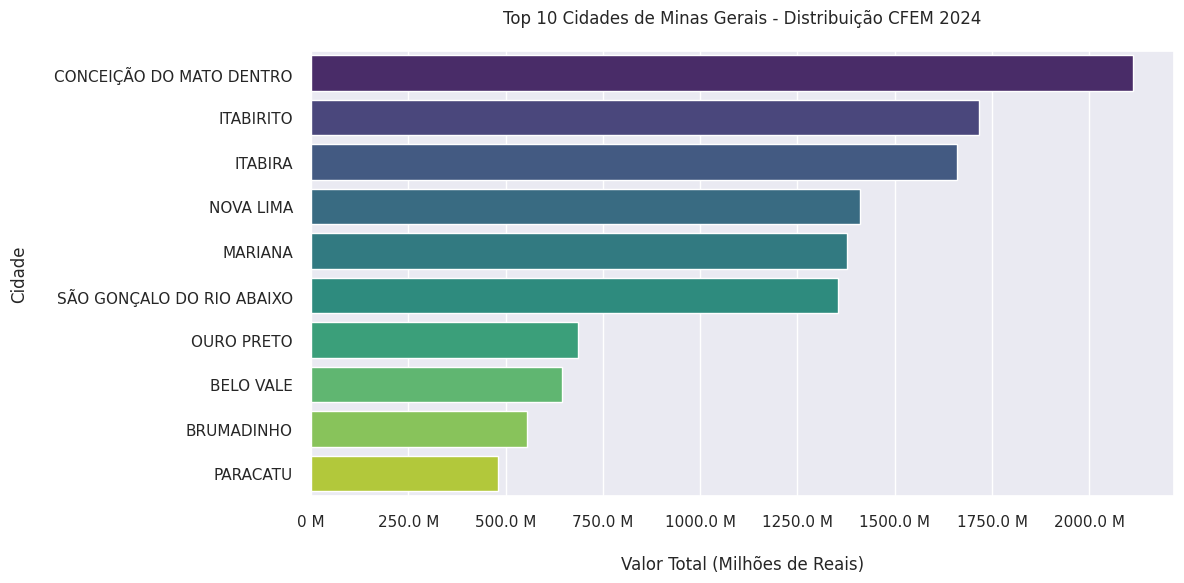

In [62]:
# 1. Gráfico de barras horizontal para as Top 10 cidades
plt.figure(figsize=(12, 6))
top_10 = df.nlargest(10, 'Total.')
ax = sns.barplot(data=top_10, y='Cidade', x='Total.', palette='viridis')
plt.title('Top 10 Cidades de Minas Gerais - Distribuição CFEM 2024', pad=20)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_axis_br))
plt.xlabel('\nValor Total (Milhões de Reais)')
plt.ylabel('Cidade\n')
plt.tight_layout()
plt.show()

In [57]:
# 2. Gráfico de linha temporal
plt.figure(figsize=(15, 6))
valores_mensais = df[meses].sum()
x = range(len(valores_mensais))
ax = plt.gca()
plt.plot(x, valores_mensais.values, marker='o', linewidth=2, color='#2E86C1')
plt.fill_between(x, valores_mensais.values, alpha=0.3, color='#2E86C1')
plt.title('Evolução Mensal da Distribuição CFEM', pad=20)
plt.xticks(x, meses, rotation=45)
plt.ylabel('Valor Total')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_axis_br))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',\n       'Nov', 'Dez'],\n      dtype='object')] are in the [columns]"

<Figure size 1500x600 with 0 Axes>

In [58]:
# 3. Gráfico de pizza interativo com Plotly
top_5_cidades = df.nlargest(5, 'Total.')  # Top 5 cidades para o gráfico de pizza
fig = go.Figure(data=[go.Pie(
    labels=top_5_cidades['Cidade'],
    values=top_5_cidades['Total.'],
    hole=.4,
    textinfo='percent+label',
    hovertemplate="Cidade: %{label}<br>" +
                  "Valor: %{value:,.2f}<br>" +
                  "Percentual: %{percent}<br>" +
                  "<extra></extra>"
)])
fig.update_layout(
    title='Distribuição CFEM - Top 5 Cidades',
    annotations=[dict(text='CFEM 2024', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

In [59]:
# 4. Box plot para análise de distribuição dos valores
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df[meses], palette='Set3')
plt.title('Distribuição dos Valores Mensais', pad=20)
plt.xticks(rotation=45)
plt.ylabel('Valor')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_axis_br))
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',\n       'Nov', 'Dez'],\n      dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

In [60]:
# 5. Estatísticas gerais em um gráfico de indicadores usando Plotly
# Função para formatar valores em reais no formato brasileiro (usada no prefixo ou suffix)
def format_currency_br_prefix(value):
    return f"R$ {value:,.2f}".replace(',', 'x').replace('.', ',').replace('x', '.')

# Ajustando os indicadores com valores formatados diretamente no prefixo
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
           [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}]]
)

# Adicionar indicadores com formatação correta no prefixo
fig.add_trace(
    go.Indicator(
        mode="number",
        value=df['Total.'].sum(),
        title="Total Distribuído",
        number={'prefix': format_currency_br_prefix(df['Total.'].sum())}
    ),
    row=1, col=1
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=df['Total.'].mean(),
        title="Média por Cidade",
        number={'prefix': format_currency_br_prefix(df['Total.'].mean())}
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=df['Total.'].max(),
        title="Maior Valor",
        number={'prefix': format_currency_br_prefix(df['Total.'].max())}
    ),
    row=1, col=3
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=df[df['Total.'] > 0]['Total.'].min(),
        title="Menor Valor (não zero)",
        number={'prefix': format_currency_br_prefix(df[df['Total.'] > 0]['Total.'].min())}
    ),
    row=2, col=1
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=df['Total.'].std(),
        title="Desvio Padrão",
        number={'prefix': format_currency_br_prefix(df['Total.'].std())}
    ),
    row=2, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=len(df[df['Total.'] > 0]),
        title="Número de Cidades"
    ),
    row=2, col=3
)

fig.update_layout(
    height=500,
    title='Estatísticas Gerais da Distribuição CFEM',
    showlegend=False
)

fig.show()